Objective: Apply Decision Tree Classification to the dataset mentioned in the notebook MScLab 1. Record the accuracy, precision, recall, and f1-score when the data is:

1. Not scaled/normalized
2. Scaled but not oversampled
3. Scaled and oversampled

Repeat the same on another dataset from the UCI repository for the binary classification problem.

Author:
Purnima Kumar <br>
MSc. Computer Science, Sem II <br>
Class Roll No.: 41

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/mscMLNotebooks')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install ucimlrepo

In [50]:
from ucimlrepo import fetch_ucirepo

magicGammaTelescope = fetch_ucirepo(id=159)
featuresData = magicGammaTelescope.data.features
labelData = magicGammaTelescope.data.targets

print(magicGammaTelescope.metadata)
print(magicGammaTelescope.variables)

{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [51]:
print(featuresData.shape)
print(labelData.shape)

(19020, 10)
(19020, 1)


In [56]:
import pandas as pd

df = pd.concat([featuresData,labelData],axis=1)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [57]:
df["class"] = (df["class"] == "g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


Ploatting histograms for the dataset

fLength


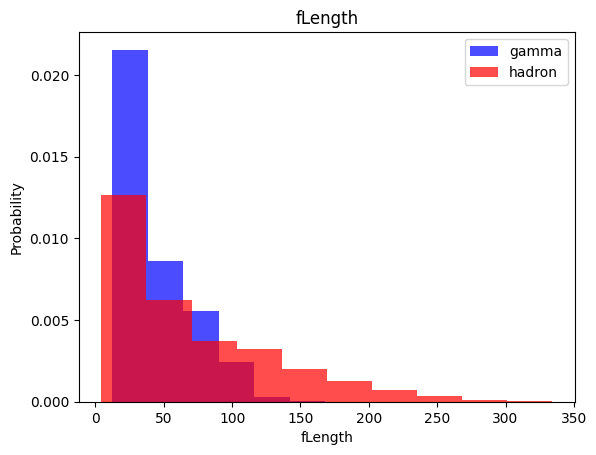

fWidth


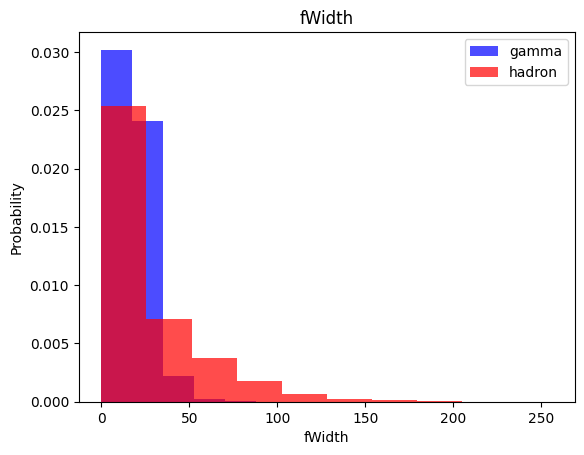

fSize


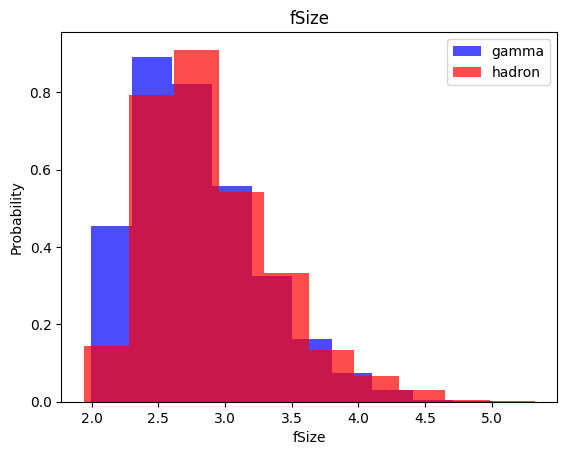

fConc


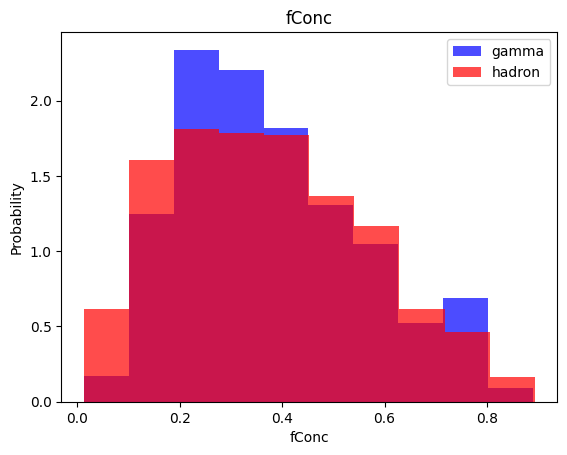

fConc1


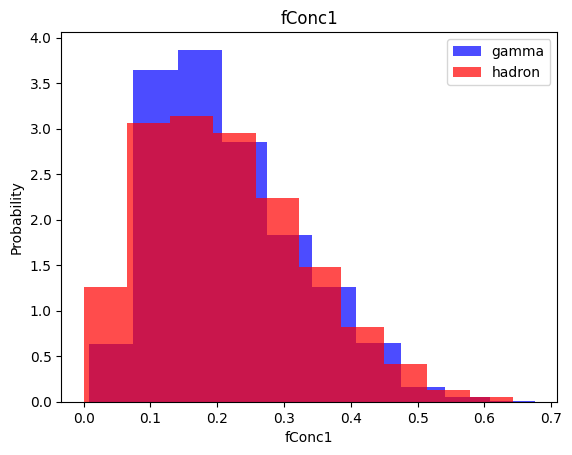

fAsym


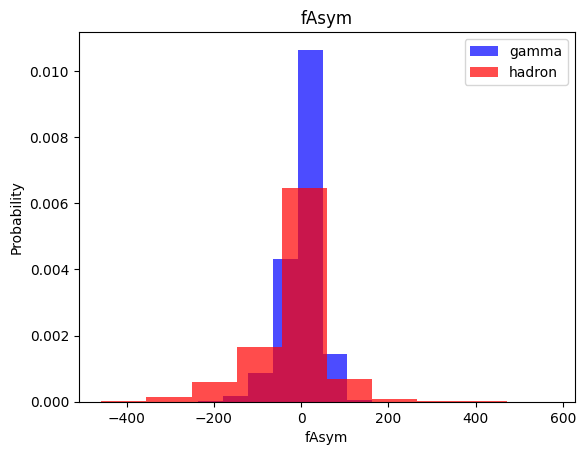

fM3Long


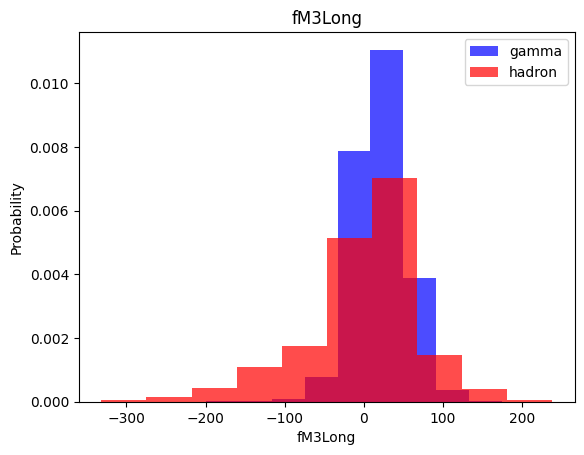

fM3Trans


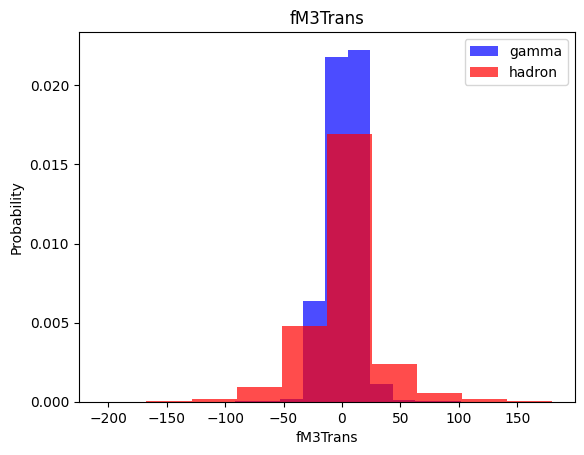

fAlpha


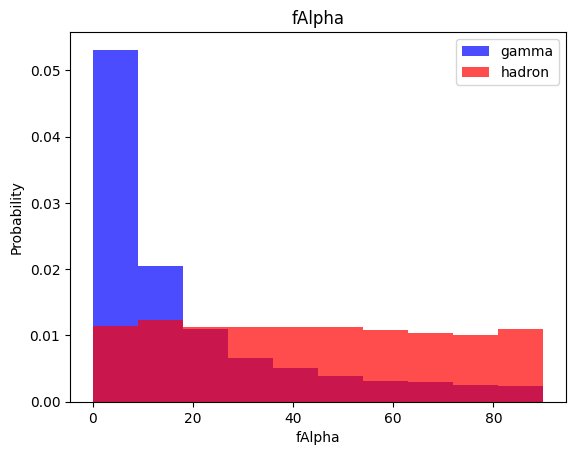

fDist


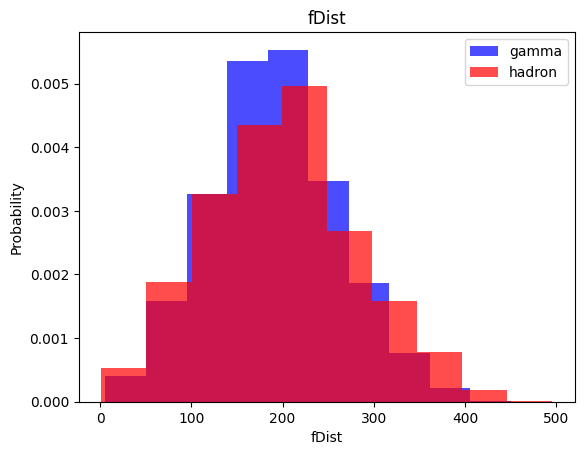

In [64]:
for feature in df.columns[:-1]:
  print(feature)
  plt.hist(df[df["class"]==1][feature],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][feature],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

Split dataset into train, test, and validation

In [65]:
# storing renamed labels
renamedLabel = df.iloc[:,-1]
renamedLabel

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featuresData, renamedLabel, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Training Set

In [73]:
X_train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
616,25.0822,10.9047,2.5775,0.5212,0.2712,21.7270,-17.8951,-7.3121,6.2190,180.699
10725,13.1598,10.4453,2.1414,0.7870,0.4874,13.1831,5.6563,-10.5963,34.5856,179.096
16645,18.4268,10.4534,2.1584,0.5625,0.3090,23.2750,9.8267,-3.2842,73.1980,172.494
500,17.0875,11.2666,2.2553,0.5667,0.3083,0.7686,-5.2321,4.9075,56.4005,142.859
17002,214.9680,52.8938,3.9427,0.0973,0.0508,-113.1400,-243.2760,19.1703,15.6930,216.928
...,...,...,...,...,...,...,...,...,...,...
3027,45.1020,20.0974,3.1647,0.1930,0.0975,34.5486,31.4351,-8.0756,1.2698,171.526
2732,27.2726,12.6129,2.7288,0.3978,0.2512,-10.4679,-17.5545,-9.9008,3.7890,185.431
2100,97.0464,12.2902,2.7214,0.2811,0.1491,-122.3730,84.5137,3.9472,30.2970,231.445
8144,19.9527,6.5626,2.2292,0.8201,0.5162,17.6483,16.5275,-5.1195,56.6840,189.301


In [74]:
y_train

616      1
10725    1
16645    0
500      1
17002    0
        ..
3027     1
2732     1
2100     1
8144     1
10145    1
Name: class, Length: 11412, dtype: int64

Test Set

In [75]:
X_test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
18749,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240
7051,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420
10901,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030
15858,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655
17968,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730
...,...,...,...,...,...,...,...,...,...,...
8138,12.9935,11.0298,2.3149,0.7506,0.4479,-14.2100,6.4590,-9.7896,50.9220,48.6180
10263,44.8332,10.5008,2.7067,0.4656,0.2485,3.4712,-34.5551,7.9535,4.9965,185.9660
3289,29.1486,16.3655,2.7756,0.3755,0.2054,-9.5722,-19.5828,11.0002,15.2554,116.6320
9384,27.5346,17.1474,2.6637,0.3384,0.1746,-6.5985,18.9573,12.9865,2.5393,99.1698


In [76]:
y_test

18749    0
7051     1
10901    1
15858    0
17968    0
        ..
8138     1
10263    1
3289     1
9384     1
16051    0
Name: class, Length: 3804, dtype: int64

Validation Set

In [77]:
X_val

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
14399,68.7932,13.8229,2.9852,0.2411,0.1319,61.8907,43.4369,-4.8860,60.8680,173.4750
7452,24.8547,10.3282,2.3720,0.4798,0.2484,-15.1247,17.5911,-2.3673,57.7690,178.0030
15291,24.7271,14.5628,2.6069,0.4277,0.2460,-8.7600,-14.9319,8.5488,79.5231,203.7670
18249,30.5492,14.3894,2.5031,0.3925,0.2151,-37.6521,-20.5573,-9.1825,50.6983,120.9150
1083,17.4409,10.3517,2.3674,0.6352,0.4099,-0.0001,-0.3427,7.7081,35.9057,160.3800
...,...,...,...,...,...,...,...,...,...,...
2719,26.3093,15.0286,2.6048,0.4099,0.2149,-16.9862,13.6780,-11.2164,2.5210,120.5800
8976,24.0631,10.2463,2.4601,0.5269,0.2652,-15.2259,16.2003,6.3309,11.6251,94.0879
7035,25.1972,14.9914,2.2707,0.4504,0.2332,4.3585,9.9610,-12.5223,5.1610,192.3680
4558,19.8412,16.7819,2.3128,0.4818,0.2993,14.3041,18.3897,-13.8364,13.1411,200.0710


In [78]:
y_val

14399    0
7452     1
15291    0
18249    0
1083     1
        ..
2719     1
8976     1
7035     1
4558     1
7526     1
Name: class, Length: 3804, dtype: int64

# Decision Tree for Model 1
Dataset is not scaled/normalized

In [80]:
# Decision Tree classifier for the dataset when not scaled/normalized

from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
model = tree_classifier.fit(X_train, y_train)

[Text(0.5500661016635736, 0.9857142857142858, 'x[8] <= 23.98\ngini = 0.455\nsamples = 11412\nvalue = [3994, 7418]'),
 Text(0.32332709205389293, 0.9571428571428572, 'x[0] <= 119.546\ngini = 0.281\nsamples = 6552\nvalue = [1110, 5442]'),
 Text(0.15525381230372978, 0.9285714285714286, 'x[6] <= -67.643\ngini = 0.243\nsamples = 6295\nvalue = [890, 5405]'),
 Text(0.010321225527529577, 0.9, 'x[8] <= 8.233\ngini = 0.407\nsamples = 102\nvalue = [73, 29]'),
 Text(0.006041692991724631, 0.8714285714285714, 'x[1] <= 40.817\ngini = 0.496\nsamples = 46\nvalue = [21, 25]'),
 Text(0.0040277953278164205, 0.8428571428571429, 'x[9] <= 142.281\ngini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.0030208464958623154, 0.8142857142857143, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.005034744159770526, 0.8142857142857143, 'x[7] <= 21.189\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.0030208464958623154, 0.7857142857142857, 'x[5] <= -111.009\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 

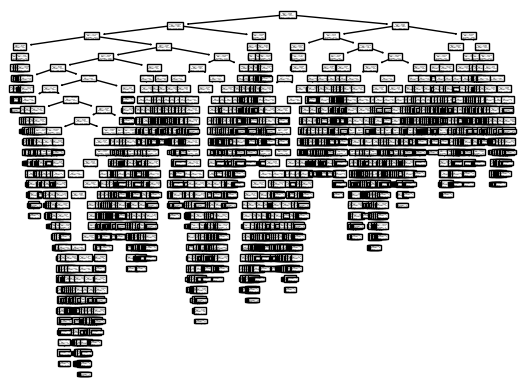

In [81]:
tree.plot_tree(model)

In [94]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("magic")

'magic.pdf'

In [84]:
y_pred = model.predict(X_val)

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Printing evaluation Metrics for the model')
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F-1 Score: ", f1)

Printing evaluation Metrics for the model
Precision:  0.8620689655172413
Recall:  0.8557457212713936
F-1 Score:  0.8588957055214723


# Decision Tree for Model 2

Dataset is scaled but not oversampled

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values)
X_trainNormalized, y_trainNormalized = scaler.transform(X_train.values), y_train.values
X_validNormalized, y_validNormalized = scaler.transform(X_val.values), y_val.values

In [101]:
model_1 = tree_classifier.fit(X_trainNormalized, y_trainNormalized)

[Text(0.5500451757842577, 0.9857142857142858, 'x[8] <= -0.14\ngini = 0.455\nsamples = 11412\nvalue = [3994, 7418]'),
 Text(0.32285214953119784, 0.9571428571428572, 'x[0] <= 1.57\ngini = 0.281\nsamples = 6552\nvalue = [1110, 5442]'),
 Text(0.15477234939635393, 0.9285714285714286, 'x[6] <= -1.537\ngini = 0.243\nsamples = 6295\nvalue = [890, 5405]'),
 Text(0.010197761369857823, 0.9, 'x[8] <= -0.742\ngini = 0.407\nsamples = 102\nvalue = [73, 29]'),
 Text(0.005969421289672872, 0.8714285714285714, 'x[1] <= 1.035\ngini = 0.496\nsamples = 46\nvalue = [21, 25]'),
 Text(0.003979614193115248, 0.8428571428571429, 'x[9] <= -0.689\ngini = 0.245\nsamples = 28\nvalue = [4, 24]'),
 Text(0.002984710644836436, 0.8142857142857143, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.00497451774139406, 0.8142857142857143, 'x[7] <= 1.009\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.002984710644836436, 0.7857142857142857, 'x[5] <= -1.815\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.00198

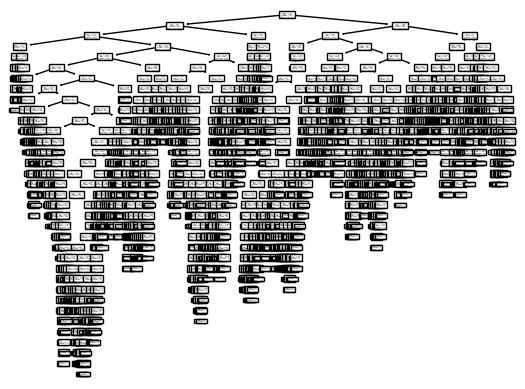

In [102]:
tree.plot_tree(model)

In [103]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model_1, out_file=None)
graph_1 = graphviz.Source(dot_data)
graph_1.render("magic_1")

'magic_1.pdf'

In [104]:
y_pred_1 = model_1.predict(X_validNormalized)
print('Printing evaluation Metrics for the model')
precision_1 = precision_score(y_validNormalized, y_pred_1)
recall_1 = recall_score(y_validNormalized, y_pred_1)
f1_score_1 = f1_score(y_validNormalized, y_pred_1)

print("Precision: ", precision_1)
print("Recall: ", recall_1)
print("F-1 Score: ", f1_score_1)

Printing evaluation Metrics for the model
Precision:  0.8611909650924024
Recall:  0.8545232273838631
F-1 Score:  0.8578441399059112


# Decision Tree for Model 3

Dataset is scaled and oversampled

In [108]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_trainOversampledScaled, y_trainOversampledScaled = ros.fit_resample(X_trainNormalized, y_trainNormalized)
X_validOversampledScaled, y_validOversampledScaled = ros.fit_resample(X_validNormalized, y_validNormalized)

[Text(0.5154507320750663, 0.9833333333333333, 'x[8] <= -0.254\ngini = 0.5\nsamples = 14836\nvalue = [7418, 7418]'),
 Text(0.31462419273353087, 0.95, 'x[0] <= 1.19\ngini = 0.385\nsamples = 7040\nvalue = [1831, 5209]'),
 Text(0.22536542128877354, 0.9166666666666666, 'x[8] <= -0.605\ngini = 0.332\nsamples = 6392\nvalue = [1345, 5047]'),
 Text(0.12458865001612643, 0.8833333333333333, 'x[4] <= 0.791\ngini = 0.266\nsamples = 4736\nvalue = [748, 3988]'),
 Text(0.03643461477110985, 0.85, 'x[6] <= -1.26\ngini = 0.223\nsamples = 4159\nvalue = [533, 3626]'),
 Text(0.009199077287674499, 0.8166666666666667, 'x[1] <= 0.923\ngini = 0.496\nsamples = 116\nvalue = [63, 53]'),
 Text(0.0049360902519229016, 0.7833333333333333, 'x[9] <= -0.001\ngini = 0.467\nsamples = 78\nvalue = [29, 49]'),
 Text(0.001794941909790146, 0.75, 'x[2] <= -0.318\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.000897470954895073, 0.7166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.002692412864685219, 0

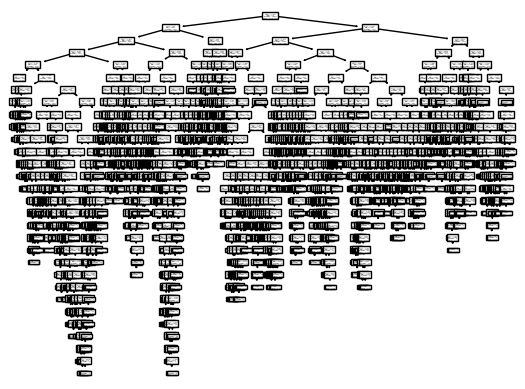

In [109]:
model_2 = tree_classifier.fit(X_trainOversampledScaled, y_trainOversampledScaled)
tree.plot_tree(model_2)

In [110]:
import graphviz

# Importing the decision tree using the Graphviz library
dot_data = tree.export_graphviz(model_2, out_file=None)
graph_2 = graphviz.Source(dot_data)
graph_2.render("magic_2")

'magic_2.pdf'

In [111]:
y_pred_2 = model_2.predict(X_validOversampledScaled)
print('Printing evaluation Metrics for the model')
precision_2 = precision_score(y_validOversampledScaled, y_pred_2)
recall_2 = recall_score(y_validOversampledScaled, y_pred_2)
f1_score_2 = f1_score(y_validOversampledScaled, y_pred_2)

print("Precision: ", precision_2)
print("Recall: ", recall_2)
print("F-1 Score: ", f1_score_2)

Printing evaluation Metrics for the model
Precision:  0.7565341926244182
Recall:  0.8610431947840261
F-1 Score:  0.8054126167333715
